<a href="https://colab.research.google.com/github/Asruz/Tugas/blob/main/Tugas_EDA_TransformasiData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TRANSFORMASI DATA**

##**DATA PREPARATION**

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [ ]:
df = pd.read_csv("KUISIONER QTELA TEMPE (Responses) - used.csv")

df

,Timestamp,"Apakah anda lebih memilih twin tower sebagai sarana untuk berkegiatan akademik dibandingkan fasilitas belajar lain (perpustakaan, kelas lama)?",Nama,NPM,Prodi \nContoh : Sains Data,Fakultas,Nomor WhatsApp \nContoh 081224367245,Apakah Anda bersedia untuk mengisi pertanyaan - pertanyaan berikut ini?,Apakah fasilitas di twin tower mendukung mahasiswa yang difabel?,Apakah Anda lebih memilih melakukan diskusi kelompok di Twin Tower dibandingkan tempat lain?,Apakah Anda merasa keberadaan Twin Tower meningkatkan citra/branding kampus UPN “Veteran” Jawa Timur?,"Apakah Anda merasa lingkungan Twin Tower (kebersihan, keamanan, kenyamanan) lebih baik dibandingkan fasilitas belajar lama?","Apakah sarana prasarana baru (proyektor, sound, dll) dapat mengurangi/meredakan rasa stress anda terhadap tuntutan akademik? (tidak meredakan sama sekali, cukup meredakan, sangat meredakan)",Apakah kualitas jaringan internet di Twin Tower mendukung proses perkuliahan?,"Apakah ketersediaan colokan listrik, kursi/Meja dan proyektor memadai ?","Berapakah durasi rata - rata yang anda habiskan untuk berkegiatan akademik di Twin Tower dalam seminggu? (jam/minggu) contoh : 1,2,3...",Seberapa besar peningkatan motivasi belajar setelah perkuliahan dialihkan ke Twin Tower,Apakah fasilitas seperti lift di twin tower memadai untuk mobilisasi?,Apakah jam operasional memadai untuk jadwal perkuliahan atau kegiatan akademik lainnya?,Apakah anda puas dengan seluruh fasilitas yang ada di twin tower?,Berapakah durasi dari lantai GF menuju ruang kelas perkuliahan? (menit),Apakah fasilitas di twin tower meningkatkan fokus atau produktivitas belajar?,Seberapa besar peningkatan konsentrasi belajar Anda setelah menggunakan fasilitas Twin Tower?,"Bagaimana penilaian Anda tentang ketersediaan sumber daya pembelajaran di gedung baru (misalnya, buku, jurnal, atau sumber lain)?"
0,9/10/2025 15:21:49,Ya,Muhammad Akmal,22083010061,Sains Data,FIK,83830676277,Ya,Mungkin,Ya,Ya,Ya,cukup meredakan,4,5,6,2,3,4,4,8,5,3,3
1,9/10/2025 15:23:21,Tidak,Hizkia Samhan Rezayoshi,24083010019,Sains Data,FIK,81399642665,Ya,Ya,Tidak,Ya,Ya,cukup meredakan,5,5,3,3,2,2,3,15,3,3,3
2,9/10/2025 15:24:23,Mungkin,Talitha Panglima,22083010079,Sains Data,FIK,87826304400,Ya,Ya,Tidak,Ya,Ya,cukup meredakan,2,3,6,3,3,2,2,5 menit,3,3,3
3,9/10/2025 15:29:29,Mungkin,Princess Nauly,24044010041,HI,FISIP,89526103759,Ya,Ya,Ya,Ya,Ya,cukup meredakan,5,5,5,4,1,4,3,10 menit.,4,4,2
4,9/10/2025 16:21:42,Mungkin,Siti Luthfiani,23043010064,Ilmu komunikasi,FISIP,85801582004,Ya,Ya,Mungkin,Ya,Ya,cukup meredakan,4,2,10,4,5,3,4,"1,5",4,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161,9/15/2025 16:33:07,Ya,Musa Al Rufayyiq,24051010089,Arsitektur,FAD,895323082211,Ya,Ya,Mungkin,Ya,Ya,cukup meredakan,3,3,5,1,5,5,5,1,4,4,3
162,9/15/2025 19:59:18,Mungkin,Choirun Nissa,25043010149,Ilmu Komunikasi,FISIP,81547260909,Ya,Ya,Mungkin,Ya,Ya,cukup meredakan,4,4,3,4,4,3,4,5,4,4,2
163,9/15/2025 20:27:38,Ya,Maria Florencita,23013010065,Akuntansi,FEB,85903756341,Ya,Ya,Ya,Ya,Ya,cukup meredakan,3,3,10,4,3,4,4,3,4,4,3
164,9/15/2025 23:04:42,Ya,Benni Oberlan Sihite,24011010097,Ekonomi Pembangunan,FEB,81906658917,Ya,Ya,Ya,Ya,Ya,Sangat meredakan,4,4,1,4,4,4,4,3,4,4,4


In [ ]:
df.dtypes

,0
Timestamp,object
"Apakah anda lebih memilih twin tower sebagai sarana untuk berkegiatan akademik dibandingkan fasilitas belajar lain (perpustakaan, kelas lama)?",object
Nama,object
NPM,int64
Prodi \nContoh : Sains Data,object
Fakultas,object
Nomor WhatsApp \nContoh 081224367245,int64
Apakah Anda bersedia untuk mengisi pertanyaan - pertanyaan berikut ini?,object
Apakah fasilitas di twin tower mendukung mahasiswa yang difabel?,object
Apakah Anda lebih memilih melakukan diskusi kelompok di Twin Tower dibandingkan tempat lain?,object


##**DATA CLEANING**

In [ ]:
if "Berapakah durasi dari lantai GF menuju ruang kelas perkuliahan? (menit)" in df.columns:
    df["Berapakah durasi dari lantai GF menuju ruang kelas perkuliahan? (menit)"] = (
        df["Berapakah durasi dari lantai GF menuju ruang kelas perkuliahan? (menit)"]
        .astype(str)
        .str.replace("menit", "", regex=False)
        .str.strip()
    )
    df["Berapakah durasi dari lantai GF menuju ruang kelas perkuliahan? (menit)"] = pd.to_numeric(df["Berapakah durasi dari lantai GF menuju ruang kelas perkuliahan? (menit)"], errors="coerce")

Tujuan codingan diatas yaitu Membersihkan dan menormalisasi jawaban survei durasi, karena jawaban responden sering berformat "5 menit", "10 menit", atau kadang "±7 menit". Kode ini otomatis:

1. Memastikan kolomnya ada.

2. Menghapus teks "menit".

3. Menghilangkan spasi berlebih.

4. Mengubah type data string menjadi angka (int atau float).

Sehingga dapat langsung melakukan perhitungan statistik seperti rata-rata durasi, distribusi, dll

In [ ]:
if "Berapakah durasi rata - rata yang anda habiskan untuk berkegiatan akademik di Twin Tower dalam seminggu? (jam/minggu) contoh : 1,2,3..." in df.columns:
    df["Berapakah durasi rata - rata yang anda habiskan untuk berkegiatan akademik di Twin Tower dalam seminggu? (jam/minggu) contoh : 1,2,3..."] = pd.to_numeric(
        df["Berapakah durasi rata - rata yang anda habiskan untuk berkegiatan akademik di Twin Tower dalam seminggu? (jam/minggu) contoh : 1,2,3..."],
        errors="coerce"
    )

Tujuan codingan diatas yaitu menyiapkan data numerik jam/minggu kegiatan akademik.

Supaya bisa langsung menghitung rata-rata, median, atau membuat grafik jam kegiatan per minggu:

Jadi mirip dengan contoh “durasi GF ke kelas” sebelumnya, hanya saja ini untuk kolom “durasi rata-rata jam/minggu kegiatan akademik” responden.

In [ ]:
df.dtypes

,0
Timestamp,object
"Apakah anda lebih memilih twin tower sebagai sarana untuk berkegiatan akademik dibandingkan fasilitas belajar lain (perpustakaan, kelas lama)?",object
Nama,object
NPM,int64
Prodi \nContoh : Sains Data,object
Fakultas,object
Nomor WhatsApp \nContoh 081224367245,int64
Apakah Anda bersedia untuk mengisi pertanyaan - pertanyaan berikut ini?,object
Apakah fasilitas di twin tower mendukung mahasiswa yang difabel?,object
Apakah Anda lebih memilih melakukan diskusi kelompok di Twin Tower dibandingkan tempat lain?,object


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

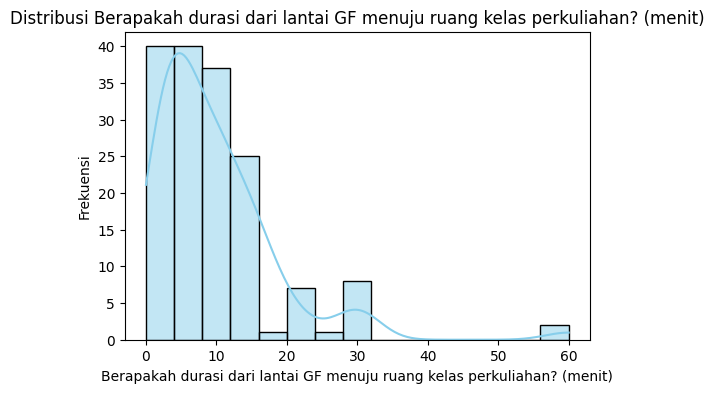

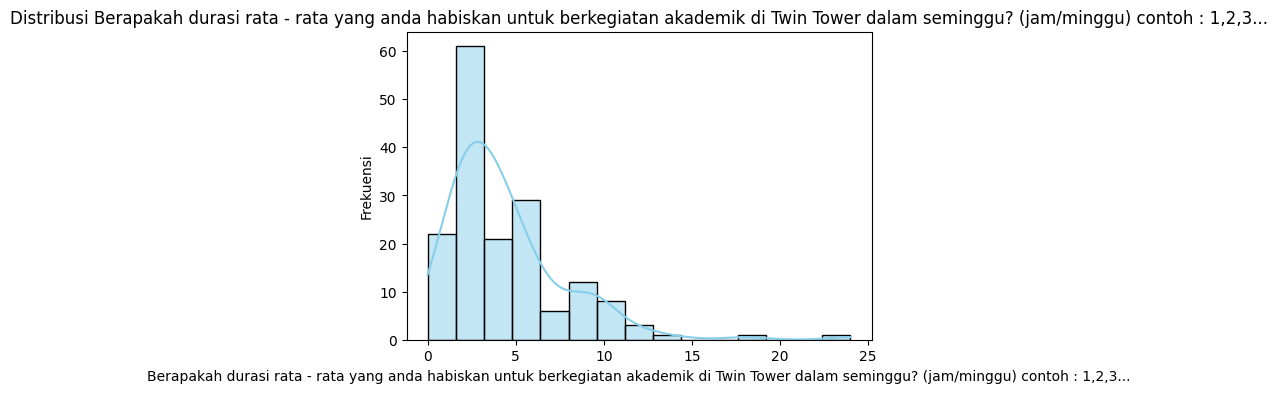

In [ ]:
for col in ["Berapakah durasi dari lantai GF menuju ruang kelas perkuliahan? (menit)"]:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col], kde=True, bins=15, color="skyblue")
        plt.title(f"Distribusi {col}")
        plt.xlabel(col)
        plt.ylabel("Frekuensi")

for col in ["Berapakah durasi rata - rata yang anda habiskan untuk berkegiatan akademik di Twin Tower dalam seminggu? (jam/minggu) contoh : 1,2,3..."]:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col], kde=True, bins=15, color="skyblue")
        plt.title(f"Distribusi {col}")
        plt.xlabel(col)
        plt.ylabel("Frekuensi")

        plt.show()

Codingan diatas menggambar histogram distribusi untuk dua variabel kuantitatif: “Durasi GF ke Kelas (menit)” dan “Durasi Akademik”.

Lalu untuk grafiknya

Judul : Distribusi Durasi GF ke Kelas (menit)

Sumbu X = durasi waktu (menit) dari GF ke kelas.

Sumbu Y = frekuensi responden.

Histogram:

1. Mayoritas responden berada di kisaran 0–15 menit (batang histogram paling tinggi di area itu).

2. Ada beberapa outlier yang mengisi durasi 20–30 menit.

3. Hampir tidak ada yang >40 menit, hanya 1 orang yang menjawab sekitar 60 menit.

4. Kurva KDE biru menunjukkan distribusi condong ke kanan (skewed right) — artinya kebanyakan waktu pendek, sedikit yang lama.

Interpretasi:

Sebagian besar mahasiswa butuh waktu relatif singkat (sekitar <15 menit) untuk pindah dari GF ke ruang kelas, namun ada sebagian kecil yang butuh lebih lama (20–30 menit) bahkan sampai 60 menit.

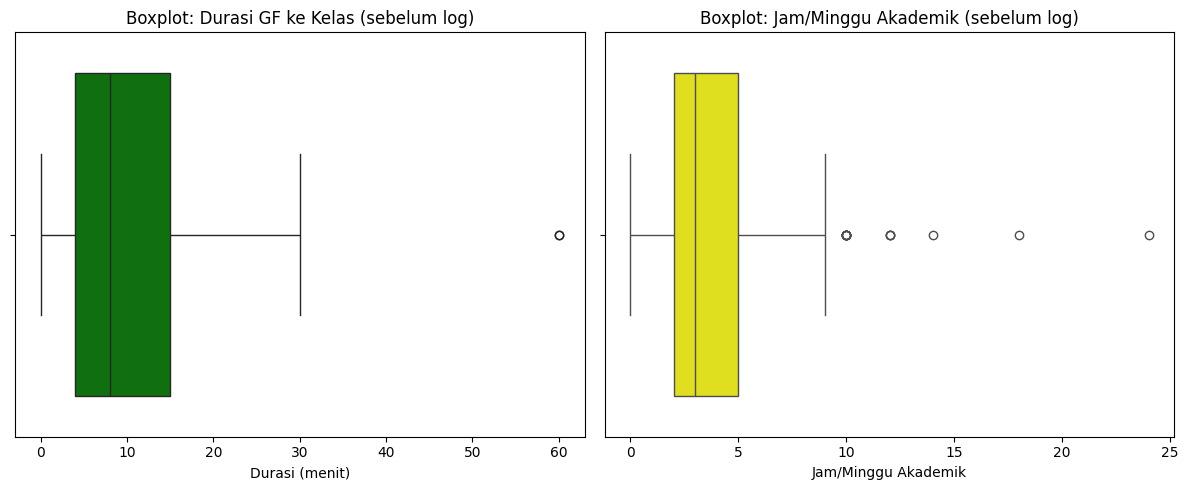

In [ ]:
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df["Berapakah durasi dari lantai GF menuju ruang kelas perkuliahan? (menit)"], color="green")
plt.title("Boxplot: Durasi GF ke Kelas (sebelum log)")
plt.xlabel("Durasi (menit)")

plt.subplot(1,2,2)
sns.boxplot(x=df["Berapakah durasi rata - rata yang anda habiskan untuk berkegiatan akademik di Twin Tower dalam seminggu? (jam/minggu) contoh : 1,2,3..."], color="yellow")
plt.title("Boxplot: Jam/Minggu Akademik (sebelum log)")
plt.xlabel("Jam/Minggu Akademik")

plt.tight_layout()
plt.show()

Tujuan coddingannya yaitu membuat visualisasi boxplot menggunakan seaborn (sns.boxplot) untuk dua variabel:

1. Durasi GF ke Kelas (menit) → variabel tentang lamanya waktu tempuh.

2. Jam/Minggu Akademik → variabel tentang durasi waktu akademik per minggu.

Grafik :

1. Boxplot: Durasi GF ke Kelas (menit)

Mayoritas data durasi perjalanan ke kelas berada di sekitar 5–15 menit (ditunjukkan oleh box).

Median (garis di dalam box) berada lebih dekat ke sisi bawah box → artinya distribusi agak condong ke kanan (right-skewed).

Ada outlier cukup jauh sekitar 60 menit, yang artinya ada mahasiswa yang butuh waktu jauh lebih lama dari rata-rata.

2. Boxplot: Jam/Minggu Akademik

Sebagian besar mahasiswa menghabiskan waktu 2–7 jam per minggu untuk kegiatan akademik.

Median berada di sekitar 3–4 jam/minggu.

Distribusi juga right-skewed karena banyak nilai tinggi (jam belajar yang besar).

Terlihat banyak outlier antara 10 hingga 24 jam/minggu, menandakan ada beberapa mahasiswa yang punya jam belajar jauh di atas mayoritas.

Interpretasi :

Kedua variabel memiliki distribusi condong ke kanan (skewed right) dengan beberapa outlier yang signifikan.

Outlier ini bisa mempengaruhi analisis statistik (misalnya rata-rata jadi terlalu tinggi).

Inilah alasan mengapa biasanya dilakukan transformasi logaritma pada data → untuk menstabilkan variansi dan mengurangi efek skewness/outlier.

In [ ]:
df["Berapakah durasi dari lantai GF menuju ruang kelas perkuliahan? (menit)"] = df["Berapakah durasi dari lantai GF menuju ruang kelas perkuliahan? (menit)"].fillna(df["Berapakah durasi dari lantai GF menuju ruang kelas perkuliahan? (menit)"].median())
df["Berapakah durasi rata - rata yang anda habiskan untuk berkegiatan akademik di Twin Tower dalam seminggu? (jam/minggu) contoh : 1,2,3..."] = df["Berapakah durasi rata - rata yang anda habiskan untuk berkegiatan akademik di Twin Tower dalam seminggu? (jam/minggu) contoh : 1,2,3..."].fillna(df["Berapakah durasi rata - rata yang anda habiskan untuk berkegiatan akademik di Twin Tower dalam seminggu? (jam/minggu) contoh : 1,2,3..."].median())


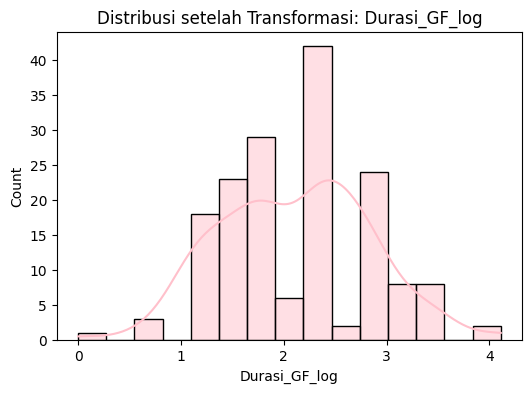

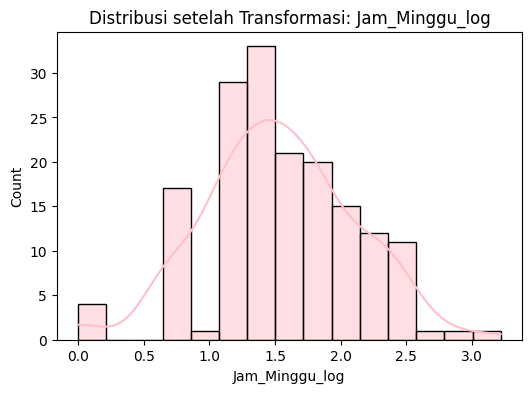

In [ ]:
df["Durasi_GF_log"] = np.log1p(df["Berapakah durasi dari lantai GF menuju ruang kelas perkuliahan? (menit)"])
df["Jam_Minggu_log"] = np.log1p(df["Berapakah durasi rata - rata yang anda habiskan untuk berkegiatan akademik di Twin Tower dalam seminggu? (jam/minggu) contoh : 1,2,3..."])

for col in ["Durasi_GF_log", "Jam_Minggu_log"]:
    if col in df.columns:
        plt.figure(figsize=(6,4))
        sns.histplot(df[col], kde=True, bins=15, color="pink")
        plt.title(f"Distribusi setelah Transformasi: {col}")
        plt.show()

Tujuan Kodingannya untuk transformasi data dengan logaritma
Dibuat dua kolom baru:

Grafik :

1. Setelah transformasi log, distribusi data Durasi GF ke Kelas menjadi jauh lebih simetris dibanding sebelumnya.

2. Histogram terlihat berbentuk mendekati lonceng (bell-shaped), meskipun belum 100% normal.

3. Sebagian besar data terkumpul di sekitar nilai log 2–3 (artinya sekitar 7–20 menit setelah dibalik log).

4. Outlier yang tadinya jauh (misalnya 60 menit) jadi lebih “terkompres” dan tidak terlalu ekstrem.

Interrpretasi

Transformasi log berhasil membuat distribusi data lebih stabil dan mendekati normal.

Ini sangat berguna kalau nanti mau dipakai untuk analisis parametrik (misalnya uji hipotesis, regresi) yang mengasumsikan normalitas.

Efek utama transformasi: mengecilkan skala nilai besar dan mengurangi pengaruh outlier.

##**ENCODING VARIABLE KATEGORIKAL (MEMBUAT DUMMY VARIABLE)**

In [ ]:
df = df.apply(lambda x: x.astype(str).str.strip())
kategori_values = ["ya", "tidak", "mungkin"]

categorical_cols = [
    col
    for col in df.columns
    if df[col].astype(str).str.lower().isin(kategori_values).any()
]

df = pd.get_dummies(df, columns=categorical_cols, drop_first=False)

for col in df.select_dtypes(include=["bool"]).columns:
    df[col] = df[col].astype(int)

Tujuan codingan diata yaitu :

1. Membersihkan jawaban survei (hapus spasi).

2. Deteksi otomatis kolom kategorikal yang jawabannya “ya/tidak/mungkin”.

3. Ubah jawaban jadi angka dummy (0/1) agar mudah dihitung statistik atau dipakai di model machine learning.

Jadi hasil akhirnya:
df_encoded adalah DataFrame bersih dan sudah punya kolom 0/1 untuk semua jawaban ya/tidak/mungkin.

In [ ]:
df_encoded

,Timestamp,Nama,NPM,Prodi \nContoh : Sains Data,Fakultas,Nomor WhatsApp \nContoh 081224367245,"Apakah sarana prasarana baru (proyektor, sound, dll) dapat mengurangi/meredakan rasa stress anda terhadap tuntutan akademik? (tidak meredakan sama sekali, cukup meredakan, sangat meredakan)",Apakah kualitas jaringan internet di Twin Tower mendukung proses perkuliahan?,"Apakah ketersediaan colokan listrik, kursi/Meja dan proyektor memadai ?","Berapakah durasi rata - rata yang anda habiskan untuk berkegiatan akademik di Twin Tower dalam seminggu? (jam/minggu) contoh : 1,2,3...",Seberapa besar peningkatan motivasi belajar setelah perkuliahan dialihkan ke Twin Tower,Apakah fasilitas seperti lift di twin tower memadai untuk mobilisasi?,Apakah jam operasional memadai untuk jadwal perkuliahan atau kegiatan akademik lainnya?,Apakah anda puas dengan seluruh fasilitas yang ada di twin tower?,Berapakah durasi dari lantai GF menuju ruang kelas perkuliahan? (menit),Apakah fasilitas di twin tower meningkatkan fokus atau produktivitas belajar?,Seberapa besar peningkatan konsentrasi belajar Anda setelah menggunakan fasilitas Twin Tower?,"Bagaimana penilaian Anda tentang ketersediaan sumber daya pembelajaran di gedung baru (misalnya, buku, jurnal, atau sumber lain)?",Durasi GF ke Kelas (menit),Jam/Minggu Akademik,Durasi_GF_log,Jam_Minggu_log,"Apakah anda lebih memilih twin tower sebagai sarana untuk berkegiatan akademik dibandingkan fasilitas belajar lain (perpustakaan, kelas lama)?_Mungkin","Apakah anda lebih memilih twin tower sebagai sarana untuk berkegiatan akademik dibandingkan fasilitas belajar lain (perpustakaan, kelas lama)?_Tidak","Apakah anda lebih memilih twin tower sebagai sarana untuk berkegiatan akademik dibandingkan fasilitas belajar lain (perpustakaan, kelas lama)?_Ya",Apakah Anda bersedia untuk mengisi pertanyaan - pertanyaan berikut ini?_Ya,Apakah fasilitas di twin tower mendukung mahasiswa yang difabel?_Mungkin,Apakah fasilitas di twin tower mendukung mahasiswa yang difabel?_Tidak,Apakah fasilitas di twin tower mendukung mahasiswa yang difabel?_Ya,Apakah Anda lebih memilih melakukan diskusi kelompok di Twin Tower dibandingkan tempat lain? _Mungkin,Apakah Anda lebih memilih melakukan diskusi kelompok di Twin Tower dibandingkan tempat lain? _Tidak,Apakah Anda lebih memilih melakukan diskusi kelompok di Twin Tower dibandingkan tempat lain? _Ya,Apakah Anda merasa keberadaan Twin Tower meningkatkan citra/branding kampus UPN “Veteran” Jawa Timur?_Mungkin,Apakah Anda merasa keberadaan Twin Tower meningkatkan citra/branding kampus UPN “Veteran” Jawa Timur?_Tidak,Apakah Anda merasa keberadaan Twin Tower meningkatkan citra/branding kampus UPN “Veteran” Jawa Timur?_Ya,"Apakah Anda merasa lingkungan Twin Tower (kebersihan, keamanan, kenyamanan) lebih baik dibandingkan fasilitas belajar lama? _Mungkin","Apakah Anda merasa lingkungan Twin Tower (kebersihan, keamanan, kenyamanan) lebih baik dibandingkan fasilitas belajar lama? _Tidak","Apakah Anda merasa lingkungan Twin Tower (kebersihan, keamanan, kenyamanan) lebih baik dibandingkan fasilitas belajar lama? _Ya"
0,9/10/2025 15:21:49,Muhammad Akmal,22083010061,Sains Data,FIK,83830676277,cukup meredakan,4,5,6,2,3,4,4,8,5,3,3,8.0,6.0,2.1972245773362196,1.9459101490553132,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,1
1,9/10/2025 15:23:21,Hizkia Samhan Rezayoshi,24083010019,Sains Data,FIK,81399642665,cukup meredakan,5,5,3,3,2,2,3,15,3,3,3,15.0,3.0,2.772588722239781,1.3862943611198906,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1
2,9/10/2025 15:24:23,Talitha Panglima,22083010079,Sains Data,FIK,87826304400,cukup meredakan,2,3,6,3,3,2,2,5 menit,3,3,3,5.0,6.0,1.791759469228055,1.9459101490553132,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1
3,9/10/2025 15:29:29,Princess Nauly,24044010041,HI,FISIP,89526103759,cukup meredakan,5,5,5,4,1,4,3,10 menit.,4,4,2,8.0,5.0,2.1972245773362196,1.791759469228055,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,9/10/2025 16:21:42,Siti Luthfiani,23043010064,Ilmu komunikasi,FISIP,85801582004,cukup meredakan,4,2,10,4,5,3,4,"1,5",

##**ENCODING SKALA KEPUASAN**

In [ ]:
mapping_sikap = {
    "Sangat Meredakan": 3,
    "Cukup Meredakan": 2,
    "Tidak Meredakan": 1
}
for col in df.columns:
  if df[col].astype(str).str.lower().isin(kategori_values).any():
    if df[col].dtype == "object" and set(df[col].dropna().unique()).intersection(mapping_sikap.keys()):
        df_encoded[col + "_ordinal"] = df[col].map(mapping_sikap)

Tujuan codingan diatas yaitu mengubah jawaban kategorikal yang bersifat bertingkat/ordinal menjadi angka.
(Misalnya tingkat “meredakan stres” → 1,2,3)

Jadi kode ini akan memindai semua kolom, dan kalau kolom itu berisi jawaban “Sangat Meredakan/Cukup Meredakan/Tidak Meredakan”, langsung dibuatkan kolom angka baru.

Dengan ini kamu jadi bisa menghitung rata-rata, distribusi skor, atau pakai untuk analisis statistik lebih lanjut.

In [ ]:
df_encoded

,Timestamp,Nama,NPM,Prodi \nContoh : Sains Data,Fakultas,Nomor WhatsApp \nContoh 081224367245,"Apakah sarana prasarana baru (proyektor, sound, dll) dapat mengurangi/meredakan rasa stress anda terhadap tuntutan akademik? (tidak meredakan sama sekali, cukup meredakan, sangat meredakan)",Apakah kualitas jaringan internet di Twin Tower mendukung proses perkuliahan?,"Apakah ketersediaan colokan listrik, kursi/Meja dan proyektor memadai ?","Berapakah durasi rata - rata yang anda habiskan untuk berkegiatan akademik di Twin Tower dalam seminggu? (jam/minggu) contoh : 1,2,3...",Seberapa besar peningkatan motivasi belajar setelah perkuliahan dialihkan ke Twin Tower,Apakah fasilitas seperti lift di twin tower memadai untuk mobilisasi?,Apakah jam operasional memadai untuk jadwal perkuliahan atau kegiatan akademik lainnya?,Apakah anda puas dengan seluruh fasilitas yang ada di twin tower?,Berapakah durasi dari lantai GF menuju ruang kelas perkuliahan? (menit),Apakah fasilitas di twin tower meningkatkan fokus atau produktivitas belajar?,Seberapa besar peningkatan konsentrasi belajar Anda setelah menggunakan fasilitas Twin Tower?,"Bagaimana penilaian Anda tentang ketersediaan sumber daya pembelajaran di gedung baru (misalnya, buku, jurnal, atau sumber lain)?",Durasi GF ke Kelas (menit),Jam/Minggu Akademik,Durasi_GF_log,Jam_Minggu_log,"Apakah anda lebih memilih twin tower sebagai sarana untuk berkegiatan akademik dibandingkan fasilitas belajar lain (perpustakaan, kelas lama)?_Mungkin","Apakah anda lebih memilih twin tower sebagai sarana untuk berkegiatan akademik dibandingkan fasilitas belajar lain (perpustakaan, kelas lama)?_Tidak","Apakah anda lebih memilih twin tower sebagai sarana untuk berkegiatan akademik dibandingkan fasilitas belajar lain (perpustakaan, kelas lama)?_Ya",Apakah Anda bersedia untuk mengisi pertanyaan - pertanyaan berikut ini?_Ya,Apakah fasilitas di twin tower mendukung mahasiswa yang difabel?_Mungkin,Apakah fasilitas di twin tower mendukung mahasiswa yang difabel?_Tidak,Apakah fasilitas di twin tower mendukung mahasiswa yang difabel?_Ya,Apakah Anda lebih memilih melakukan diskusi kelompok di Twin Tower dibandingkan tempat lain? _Mungkin,Apakah Anda lebih memilih melakukan diskusi kelompok di Twin Tower dibandingkan tempat lain? _Tidak,Apakah Anda lebih memilih melakukan diskusi kelompok di Twin Tower dibandingkan tempat lain? _Ya,Apakah Anda merasa keberadaan Twin Tower meningkatkan citra/branding kampus UPN “Veteran” Jawa Timur?_Mungkin,Apakah Anda merasa keberadaan Twin Tower meningkatkan citra/branding kampus UPN “Veteran” Jawa Timur?_Tidak,Apakah Anda merasa keberadaan Twin Tower meningkatkan citra/branding kampus UPN “Veteran” Jawa Timur?_Ya,"Apakah Anda merasa lingkungan Twin Tower (kebersihan, keamanan, kenyamanan) lebih baik dibandingkan fasilitas belajar lama? _Mungkin","Apakah Anda merasa lingkungan Twin Tower (kebersihan, keamanan, kenyamanan) lebih baik dibandingkan fasilitas belajar lama? _Tidak","Apakah Anda merasa lingkungan Twin Tower (kebersihan, keamanan, kenyamanan) lebih baik dibandingkan fasilitas belajar lama? _Ya"
0,9/10/2025 15:21:49,Muhammad Akmal,22083010061,Sains Data,FIK,83830676277,cukup meredakan,4,5,6,2,3,4,4,8,5,3,3,8.0,6.0,2.1972245773362196,1.9459101490553132,0,0,1,1,1,0,0,0,0,1,0,0,1,0,0,1
1,9/10/2025 15:23:21,Hizkia Samhan Rezayoshi,24083010019,Sains Data,FIK,81399642665,cukup meredakan,5,5,3,3,2,2,3,15,3,3,3,15.0,3.0,2.772588722239781,1.3862943611198906,0,1,0,1,0,0,1,0,1,0,0,0,1,0,0,1
2,9/10/2025 15:24:23,Talitha Panglima,22083010079,Sains Data,FIK,87826304400,cukup meredakan,2,3,6,3,3,2,2,5 menit,3,3,3,5.0,6.0,1.791759469228055,1.9459101490553132,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,1
3,9/10/2025 15:29:29,Princess Nauly,24044010041,HI,FISIP,89526103759,cukup meredakan,5,5,5,4,1,4,3,10 menit.,4,4,2,8.0,5.0,2.1972245773362196,1.791759469228055,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1
4,9/10/2025 16:21:42,Siti Luthfiani,23043010064,Ilmu komunikasi,FISIP,85801582004,cukup meredakan,4,2,10,4,5,3,4,"1,5",

##**NORMALISASI & STANDARISASI**

In [ ]:
numeric_cols = df_encoded.select_dtypes(include=[np.number]).columns

scaler = StandardScaler()
df_std = pd.DataFrame(scaler.fit_transform(df_encoded[numeric_cols]),
                      columns=[c + "_std" for c in numeric_cols])

minmax = MinMaxScaler()
df_norm = pd.DataFrame(minmax.fit_transform(df_encoded[numeric_cols]),
                       columns=[c + "_norm" for c in numeric_cols])


Tujuan cidingan ini adalah

Menghasilkan dua versi data numerik yang sudah diskalakan:

1. df_std untuk data standar (z-score).

2. df_norm untuk data normalisasi (0–1).

Ini akan berguna buat:

1. Algoritma yang sensitif skala (misal K-Means, PCA, Neural Net).

2. Membandingkan variabel yang satuan/skalanya berbeda (misal jumlah jam vs jumlah menit).

In [ ]:
df_final = pd.concat([df_encoded, df_std, df_norm], axis=1)

In [ ]:
df_final

,Timestamp,Nama,NPM,Prodi \nContoh : Sains Data,Fakultas,Nomor WhatsApp \nContoh 081224367245,"Apakah sarana prasarana baru (proyektor, sound, dll) dapat mengurangi/meredakan rasa stress anda terhadap tuntutan akademik? (tidak meredakan sama sekali, cukup meredakan, sangat meredakan)",Apakah kualitas jaringan internet di Twin Tower mendukung proses perkuliahan?,"Apakah ketersediaan colokan listrik, kursi/Meja dan proyektor memadai ?","Berapakah durasi rata - rata yang anda habiskan untuk berkegiatan akademik di Twin Tower dalam seminggu? (jam/minggu) contoh : 1,2,3...",Seberapa besar peningkatan motivasi belajar setelah perkuliahan dialihkan ke Twin Tower,Apakah fasilitas seperti lift di twin tower memadai untuk mobilisasi?,Apakah jam operasional memadai untuk jadwal perkuliahan atau kegiatan akademik lainnya?,Apakah anda puas dengan seluruh fasilitas yang ada di twin tower?,Berapakah durasi dari lantai GF menuju ruang kelas perkuliahan? (menit),Apakah fasilitas di twin tower meningkatkan fokus atau produktivitas belajar?,Seberapa besar peningkatan konsentrasi belajar Anda setelah menggunakan fasilitas Twin Tower?,"Bagaimana penilaian Anda tentang ketersediaan sumber daya pembelajaran di gedung baru (misalnya, buku, jurnal, atau sumber lain)?",Durasi GF ke Kelas (menit),Jam/Minggu Akademik,Durasi_GF_log,Jam_Minggu_log,"Apakah anda lebih memilih twin tower sebagai sarana untuk berkegiatan akademik dibandingkan fasilitas belajar lain (perpustakaan, kelas lama)?_Mungkin","Apakah anda lebih memilih twin tower sebagai sarana untuk berkegiatan akademik dibandingkan fasilitas belajar lain (perpustakaan, kelas lama)?_Tidak","Apakah anda lebih memilih twin tower sebagai sarana untuk berkegiatan akademik dibandingkan fasilitas belajar lain (perpustakaan, kelas lama)?_Ya",Apakah Anda bersedia untuk mengisi pertanyaan - pertanyaan berikut ini?_Ya,Apakah fasilitas di twin tower mendukung mahasiswa yang difabel?_Mungkin,Apakah fasilitas di twin tower mendukung mahasiswa yang difabel?_Tidak,Apakah fasilitas di twin tower mendukung mahasiswa yang difabel?_Ya,Apakah Anda lebih memilih melakukan diskusi kelompok di Twin Tower dibandingkan tempat lain? _Mungkin,Apakah Anda lebih memilih melakukan diskusi kelompok di Twin Tower dibandingkan tempat lain? _Tidak,Apakah Anda lebih memilih melakukan diskusi kelompok di Twin Tower dibandingkan tempat lain? _Ya,Apakah Anda merasa keberadaan Twin Tower meningkatkan citra/branding kampus UPN “Veteran” Jawa Timur?_Mungkin,Apakah Anda merasa keberadaan Twin Tower meningkatkan citra/branding kampus UPN “Veteran” Jawa Timur?_Tidak,Apakah Anda merasa keberadaan Twin Tower meningkatkan citra/branding kampus UPN “Veteran” Jawa Timur?_Ya,"Apakah Anda merasa lingkungan Twin Tower (kebersihan, keamanan, kenyamanan) lebih baik dibandingkan fasilitas belajar lama? _Mungkin","Apakah Anda merasa lingkungan Twin Tower (kebersihan, keamanan, kenyamanan) lebih baik dibandingkan fasilitas belajar lama? _Tidak","Apakah Anda merasa lingkungan Twin Tower (kebersihan, keamanan, kenyamanan) lebih baik dibandingkan fasilitas belajar lama? _Ya","Apakah anda lebih memilih twin tower sebagai sarana untuk berkegiatan akademik dibandingkan fasilitas belajar lain (perpustakaan, kelas lama)?_Mungkin_std","Apakah anda lebih memilih twin tower sebagai sarana untuk berkegiatan akademik dibandingkan fasilitas belajar lain (perpustakaan, kelas lama)?_Tidak_std","Apakah anda lebih memilih twin tower sebagai sarana untuk berkegiatan akademik dibandingkan fasilitas belajar lain (perpustakaan, kelas lama)?_Ya_std",Apakah Anda bersedia untuk mengisi pertanyaan - pertanyaan berikut ini?_Ya_std,Apakah fasilitas di twin tower mendukung mahasiswa yang difabel?_Mungkin_std,Apakah fasilitas di twin tower mendukung mahasiswa yang difabel?_Tidak_std,Apakah fasilitas di twin tower mendukung mahasiswa yang difabel?_Ya_std,Apakah Anda lebih memilih melakukan diskusi kelompok di Twin Tower dibandingkan tempat lain? _Mungkin_std,Apakah Anda lebih memilih me